# Unemployement rate in India

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Upload data

In [4]:
data1 = pd.read_csv(r"D:\python\project1\Unemployment in india\Unemployment in India.csv")
data1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Data Preprocessing


In [6]:
# Checking missing values
print(data1.info())  #it has some null values

# Handling Missing Values
data1.isna().sum()
data1.dropna(inplace=True)
print(data1.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Empl

In [12]:
# Feature Scaling
print(data1.columns)
data1['date']=data1[' Date'].str.strip()
data1['date']=pd.to_datetime(data1['date'], format='%d-%m-%Y')

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'date'],
      dtype='object')


# Summary Statistics


In [13]:
data1.describe(include='all')

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,date
count,740,740,740,740.000000,7.400000e+02,740.000000,740,740
unique,28,14,2,NaN,NaN,NaN,2,NaN
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban,NaN
freq,28,55,381,NaN,NaN,NaN,381,NaN
mean,NaN,NaN,NaN,11.787946,7.204460e+06,42.630122,NaN,2019-12-12 18:36:58.378378496
min,NaN,NaN,NaN,0.000000,4.942000e+04,13.330000,NaN,2019-05-31 00:00:00
25%,NaN,NaN,NaN,4.657500,1.190404e+06,38.062500,NaN,2019-08-31 00:00:00
50%,NaN,NaN,NaN,8.350000,4.744178e+06,41.160000,NaN,2019-11-30 00:00:00
75%,NaN,NaN,NaN,15.887500,1.127549e+07,45.505000,NaN,2020-03-31 00:00:00
max,NaN,NaN,NaN,76.740000,4.577751e+07,72.570000,NaN,2020-06-30 00:00:00


In [14]:
data1.columns = data1.columns.str.strip() #removing un_nesessaru space in column name

In [15]:
data1.columns # show all column name

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'date'],
      dtype='object')

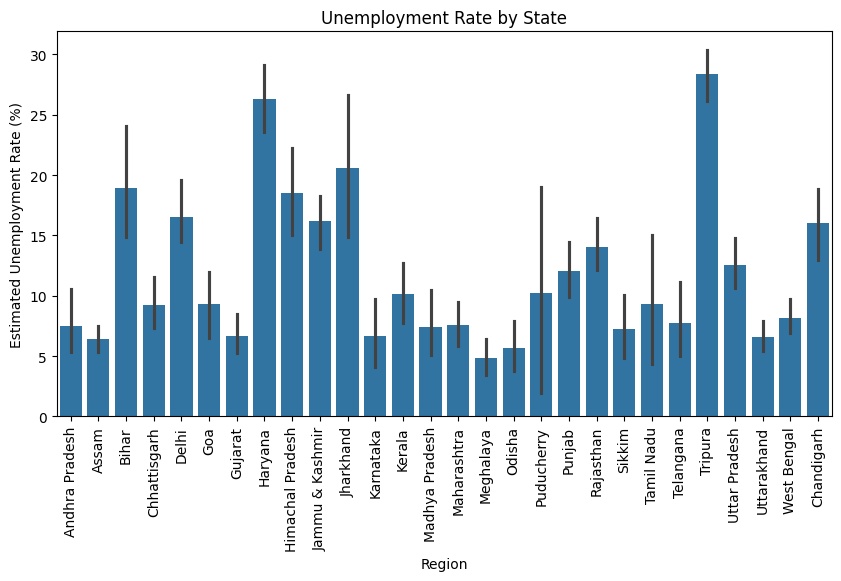

In [16]:
#plot Unemployment rate by state
plt.figure(figsize=(10,5))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data= data1)
plt.xticks(rotation=90)
plt.title("Unemployment Rate by State")
plt.show()

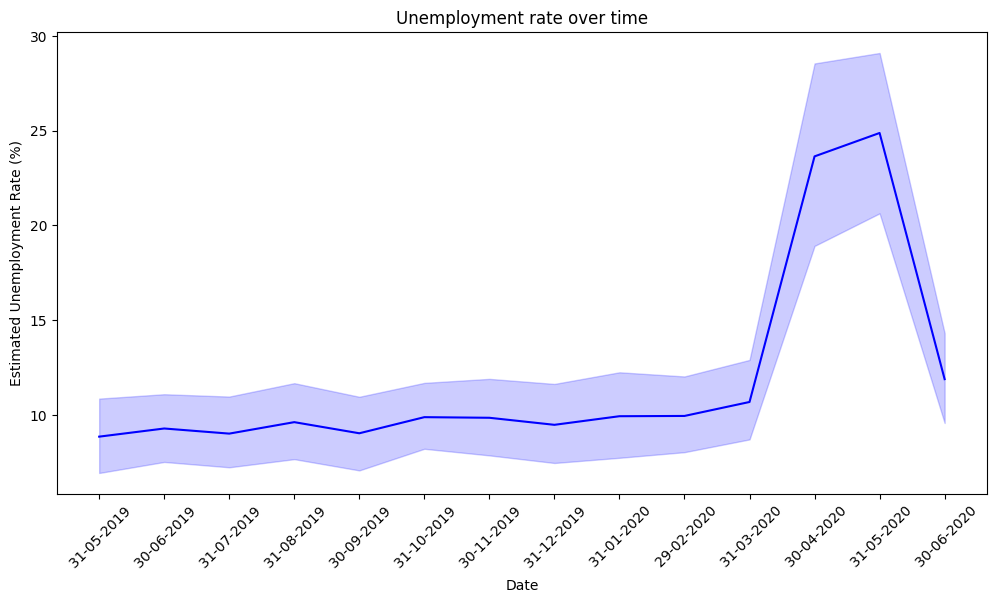

In [17]:
# Unemployment rate over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data1, markers='o', color = 'b')
plt.xticks(rotation = 45)
plt.title('Unemployment rate over time')
plt.show()

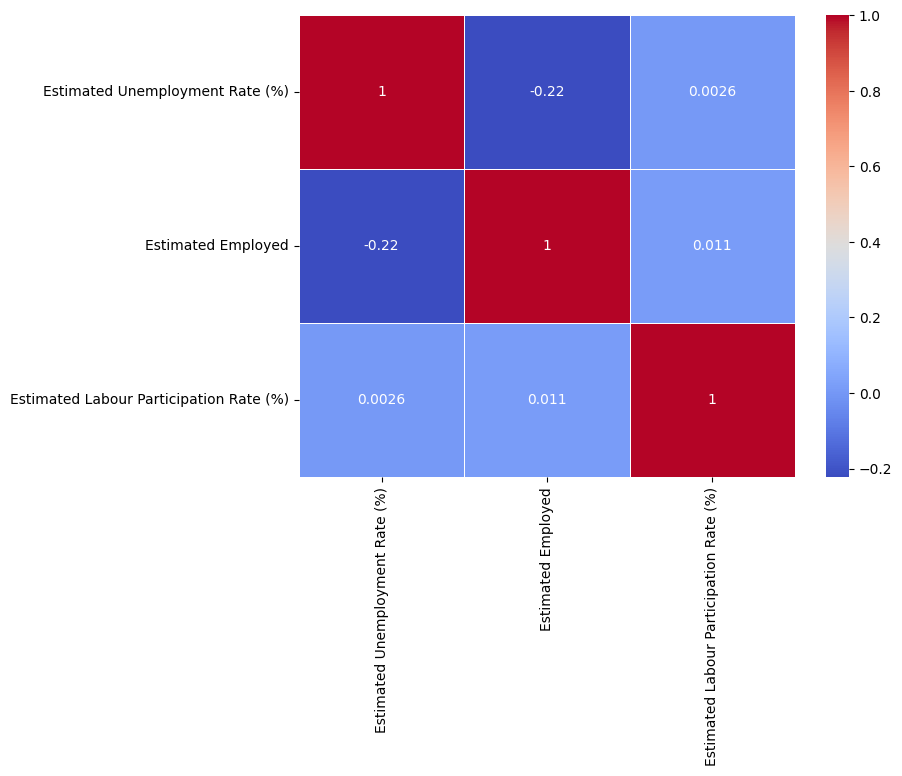

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(data1.corr(numeric_only=['numbers']), annot=True, cmap='coolwarm', linewidths= 0.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [20]:
## Top 5 Regions with Highest Unemployment Rates
covid_period_start='2020-03-01'
covid_period_end='2020-12-31'
covid_data = data1[(data1['date']>=covid_period_start)&(data1['date']<=covid_period_end)]
top_region = covid_data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending =False).head()
print(top_region)

Region
Puducherry    38.95500
Jharkhand     36.34875
Haryana       34.65250
Bihar         31.63125
Tripura       26.70250
Name: Estimated Unemployment Rate (%), dtype: float64


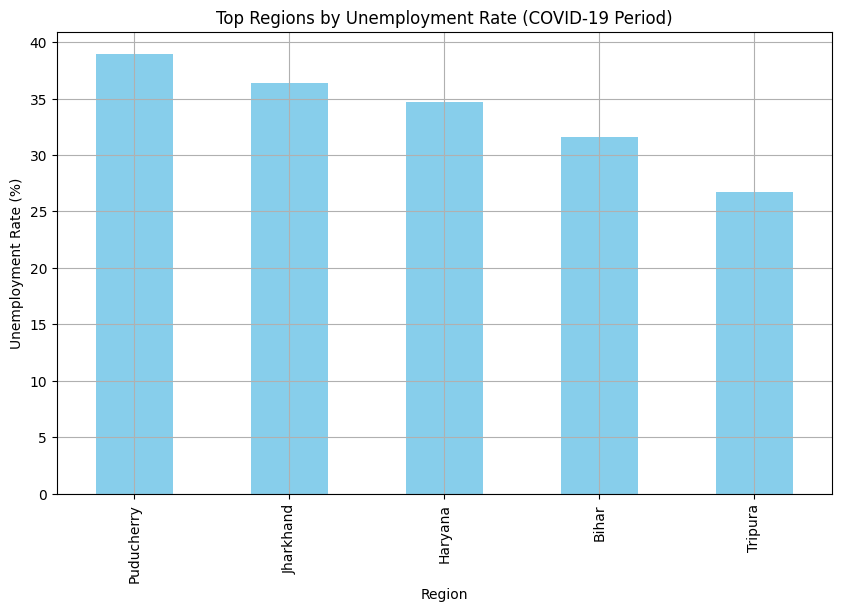

In [22]:
plt.figure(figsize=(10, 6))
top_region.plot(kind='bar', color='skyblue', label='DataSet')
plt.title('Top Regions by Unemployment Rate (COVID-19 Period)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Region')
plt.grid()
plt.show()